## Welcome to the Linear_Regression notebook

Goals of this notebook:
* Use Pandas and Scikit-Learn to train a Linear Regression Model on PrEP users(per NJ county per year), to estimate prep users up until 2030 (11 years into the future)

## Import Necessary Libraries

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


## Load in the Dataset

In [ ]:
# Primary key = GEOID, year

pp = pd.read_csv('MIS_data.csv')

print(pp.columns)

#remove the empty columns (which exist due to A-Z naming of columns)
pp = pp[['GEO ID', 'County', 'State', 'Year', 'County PrEP Users',
       'HIV New Incidences', 'Census Population Estimates',
       'Median Household Income', 'Unemployment Rate', 'PnR']]

print(pp.columns)

pp = pp.drop('State', axis=1) #state is always NJ, hence is useless info

#attempt to feature engineer with the creation of interaction terms
#pp['Year_Income_Interaction'] = pp['Year'] * pp['Median Household Income']
#pp['Year_Unemployment_Interaction'] = pp['Year'] * pp['Unemployment Rate']
#pp['HIV_Incidences_Pop_Interaction'] = pp['HIV New Incidences'] * pp['Census Population Estimates']

pp.groupby(['GEO ID', 'Year'])

pp.head()

#pp.head()

#pp_PrEP = pp[['GEO ID', 'Year', 'County PrEP Users']]
#pp_PrEP.groupby(['Year', 'GEO ID', 'County PrEP Users'])['County PrEP Users']
#pp_PrEP.head()


#pp_PrEP.plot(kind='line')

Index(['GEO ID', 'County', 'State', 'Year', 'County PrEP Users',
       'HIV New Incidences', 'Census Population Estimates',
       'Median Household Income', 'Unemployment Rate', 'PnR', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')
Index(['GEO ID', 'County', 'State', 'Year', 'County PrEP Users',
       'HIV New Incidences', 'Census Population Estimates',
       'Median Household Income', 'Unemployment Rate', 'PnR'],
      dtype='object')


,GEO ID,County,Year,County PrEP Users,HIV New Incidences,Census Population Estimates,Median Household Income,Unemployment Rate,PnR,Year_Income_Interaction,Year_Unemployment_Interaction,HIV_Incidences_Pop_Interaction
0,34001,Atlantic County,2012,14,56.0,274657,50881,12.8,0.250000,102372572,25753.6,15380792.0
1,34003,Bergen County,2012,34,63.0,916299,82001,7.7,0.539683,164986012,15492.4,57726837.0
2,34005,Burlington County,2012,18,45.0,450667,74285,8.7,0.400000,149461420,17504.4,20280015.0
3,34007,Camden County,2012,30,67.0,511636,58572,10.8,0.447761,117846864,21729.6,34279612.0
4,34009,Cape May County,2012,5,10.0,96267,55175,15.5,0.500000,111012100,31186.0,962670.0


In [319]:
# Linear Regression here we go!
# Original accuracy: 0.3159399717382585

from sklearn.metrics import f1_score

pp_input_vars = pp.copy()
pp_input_vars = pp_input_vars.drop('County PrEP Users', axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(pp_input_vars[['GEO ID', 'Year']], pp['County PrEP Users'], random_state = 0)

pipe = Pipeline([('Scaler', StandardScaler()),
                 ('Linear', LinearRegression())])

pipe.fit(X_train, y_train)

# Get Model Performance
print(pipe.score(X_test, y_test))



0.3159399717382585


## Predicting PrEP users for 2020-2030

Inclusive, hence 11 years

In [320]:
# Predicting the future! Oooooooh! 👻🔮

GEO_IDs = pp['GEO ID'].unique() # list of unique GEO_IDs (21 total for 21 NJ counties)

future_years = pd.DataFrame([
    {"GEO ID": geo_id, "Year": year}
    for geo_id in GEO_IDs
    for year in range(2020, 2031)
])

future_years

future_predictions = pipe.predict(future_years)
print(future_predictions)


[345.83811877 386.03110967 426.22410058 466.41709148 506.61008239
 546.80307329 586.99606419 627.1890551  667.382046   707.5750369
 747.76802781 341.92874712 382.12173803 422.31472893 462.50771983
 502.70071074 542.89370164 583.08669254 623.27968345 663.47267435
 703.66566525 743.85865616 338.01937548 378.21236638 418.40535728
 458.59834819 498.79133909 538.98432999 579.1773209  619.3703118
 659.5633027  699.75629361 739.94928451 334.11000383 374.30299473
 414.49598563 454.68897654 494.88196744 535.07495835 575.26794925
 615.46094015 655.65393106 695.84692196 736.03991286 330.20063218
 370.39362308 410.58661399 450.77960489 490.97259579 531.1655867
 571.3585776  611.5515685  651.74455941 691.93755031 732.13054121
 326.29126053 366.48425144 406.67724234 446.87023324 487.06322415
 527.25621505 567.44920595 607.64219686 647.83518776 688.02817866
 728.22116957 322.38188888 362.57487979 402.76787069 442.9608616
 483.1538525  523.3468434  563.53983431 603.73282521 643.92581611
 684.11880702 

## Visualize the Data and Predictions

Scatter plot

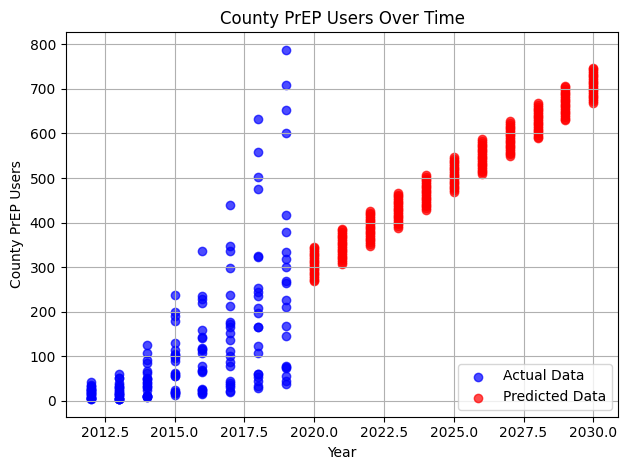

In [321]:
# Visualize the Data and Predictions

# Actual data
plt.scatter(pp['Year'], pp['County PrEP Users'], color='blue', label='Actual Data', alpha=0.7)

# Model's predictions
plt.scatter(future_years['Year'], future_predictions, color='red', label='Predicted Data', alpha=0.7)

# Formatting, so we know what is what
plt.xlabel('Year')
plt.ylabel('County PrEP Users')
plt.title('County PrEP Users Over Time')
plt.legend(loc = 'lower right')

# Show the plot
plt.grid(True)
plt.tight_layout() #spreads it out, making it easier to see
plt.show()